In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean, std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
df = pd.read_excel('Base_Problem_DataSet.xlsb', engine = 'pyxlsb')
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.000,0.000,1.000,0.000,0.000,61190.550,3416.850,Commercial,Secondary,M,Male,CL,Home,0.029,13957,1062,6123,383,NaN,1,1,0,Sales,2.000,2.000,6.000,17.000,Yes,Yes,Self-employed,0.568,0.479,NaN,0.019,63.000,NaN,0
1,12138936,20250,1.000,0.000,1.000,NaN,0.000,15282,1826.550,Service,Graduation,M,Male,CL,Home,0.009,14162,4129,7833,21,0.000,1,0,1,NaN,2.000,2.000,3.000,10.000,Yes,Yes,Government,0.563,0.215,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.000,0.000,1.000,0.000,1.000,59527.350,2788.200,Service,Graduation dropout,W,Male,CL,Family,0.023,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.000,2.000,4.000,NaN,Yes,Yes,Self-employed,NaN,0.553,0.330,0.074,277.000,0.000,0
3,12188929,15750,0.000,0.000,1.000,1.000,0.000,53870.400,2295.450,Retired,Secondary,M,Male,CL,Home,0.011,23195,365243,NaN,775,NaN,1,0,0,NaN,2.000,3.000,2.000,15.000,Yes,Yes,XNA,NaN,0.135,0.631,NaN,1700.000,3.000,0
4,12133385,33750,1.000,0.000,1.000,0.000,2.000,133988.400,3547.350,Commercial,Secondary,M,Female,CL,Home,0.021,11366,2977,5516,4043,6.000,1,0,0,Laborers,4.000,1.000,3.000,NaN,Yes,Yes,Business Entity Type 3,0.508,0.301,0.356,0.202,674.000,1.000,0


In [40]:
df.shape

(121856, 39)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [42]:
df1 = df.copy()

In [43]:
df = df1.copy()

### Cleaning the data

In [44]:
# dropping unwanted column
df.drop('ID', inplace = True, axis = 1)

In [45]:
df.head()

,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,6750,0.000,0.000,1.000,0.000,0.000,61190.550,3416.850,Commercial,Secondary,M,Male,CL,Home,0.029,13957,1062,6123,383,NaN,1,1,0,Sales,2.000,2.000,6.000,17.000,Yes,Yes,Self-employed,0.568,0.479,NaN,0.019,63.000,NaN,0
1,20250,1.000,0.000,1.000,NaN,0.000,15282,1826.550,Service,Graduation,M,Male,CL,Home,0.009,14162,4129,7833,21,0.000,1,0,1,NaN,2.000,2.000,3.000,10.000,Yes,Yes,Government,0.563,0.215,NaN,NaN,NaN,NaN,0
2,18000,0.000,0.000,1.000,0.000,1.000,59527.350,2788.200,Service,Graduation dropout,W,Male,CL,Family,0.023,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.000,2.000,4.000,NaN,Yes,Yes,Self-employed,NaN,0.553,0.330,0.074,277.000,0.000,0
3,15750,0.000,0.000,1.000,1.000,0.000,53870.400,2295.450,Retired,Secondary,M,Male,CL,Home,0.011,23195,365243,NaN,775,NaN,1,0,0,NaN,2.000,3.000,2.000,15.000,Yes,Yes,XNA,NaN,0.135,0.631,NaN,1700.000,3.000,0
4,33750,1.000,0.000,1.000,0.000,2.000,133988.400,3547.350,Commercial,Secondary,M,Female,CL,Home,0.021,11366,2977,5516,4043,6.000,1,0,0,Laborers,4.000,1.000,3.000,NaN,Yes,Yes,Business Entity Type 3,0.508,0.301,0.356,0.202,674.000,1.000,0


In [46]:
#removing special characters from numeric column
special_char = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 
                'Population_Fraction_by_Region', 'Work_Duration_in_Days', 'Elderliness_in_Days',
                'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Rating_Origin_3']
for i in special_char:
    df[i] = df[i].replace('\$', '',regex=True)
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [47]:
catg = df.select_dtypes(include = ['object'])
catg.head()

,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Customer_Vocation,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution
0,Commercial,Secondary,M,Male,CL,Home,Sales,Yes,Yes,Self-employed
1,Service,Graduation,M,Male,CL,Home,NaN,Yes,Yes,Government
2,Service,Graduation dropout,W,Male,CL,Family,Realty agents,Yes,Yes,Self-employed
3,Retired,Secondary,M,Male,CL,Home,NaN,Yes,Yes,XNA
4,Commercial,Secondary,M,Female,CL,Home,Laborers,Yes,Yes,Business Entity Type 3


In [48]:
# removing XNA value from categorical column
for i in list(catg.columns):
    df[i] = df[i].replace("XNA", np.nan)

### Checking the event rate of model

In [49]:
df_er = pd.DataFrame(df['Default'].value_counts())
df_er['EVENT_RATE'] = (df_er['Default'] / df_er['Default'].sum()) * 100
df_er

,Default,EVENT_RATE
0,112011,91.921
1,9845,8.079


### Checking the count of missing value

In [50]:
dict_mv_count = {i: df[i].isnull().sum() for i in df.columns}

df_mv_count = pd.DataFrame.from_dict(dict_mv_count, orient = 'index', columns = ['MV'])

df_mv_count = df_mv_count.reset_index()

In [51]:
df_mv_count['mv_percent'] = (df_mv_count['MV'] / len(df)) * 100

df_mv_count.sort_values('mv_percent', ascending = False)

,index,MV,mv_percent
19,Private_Dwelling_Duration,80095,65.729
31,Rating_Origin_1,68835,56.489
34,Community_Non-Payment_Incidence,61928,50.821
23,Customer_Vocation,41435,34.003
33,Rating_Origin_3,26922,22.093
30,Sort_of_Institution,24694,20.265
36,Solvency_Information_Agency,18540,15.215
18,Identity_Age_in_Days,5985,4.912
32,Rating_Origin_2,5686,4.666
14,Population_Fraction_by_Region,4868,3.995


### Selecting only those columns which are having less than 10% missing values

In [52]:
df_mv_final_count = df_mv_count[df_mv_count['mv_percent'] <= 25]

df_mv_final_count.reset_index(inplace = True)

mv_cols = df_mv_final_count['index'].to_list()

df = df[mv_cols]

In [53]:
df.shape

(121856, 34)

In [54]:
df['Customer_Revenue_Category'].fillna(df['Customer_Revenue_Category'].mode()[0], inplace = True)

### Split data into train & test using sample function

In [55]:
df_train = df.sample(frac = 0.8, random_state = 10)
df_test = df.drop(df_train.index)

In [56]:
print('Training set: ', df_train.shape)
print('Testing set: ', df_test.shape)

Training set:  (97485, 34)
Testing set:  (24371, 34)


### Checking the event rate of training set

In [57]:
df_er1 = pd.DataFrame(df_train['Default'].value_counts())
df_er1['EVENT_RATE'] = (df_er1['Default'] / df_er1['Default'].sum()) * 100
df_er1

,Default,EVENT_RATE
0,89607,91.919
1,7878,8.081


### Checking the event rate of testing set

In [58]:
df_er2 = pd.DataFrame(df_test['Default'].value_counts())
df_er2['EVENT_RATE'] = (df_er2['Default'] / df_er2['Default'].sum()) * 100
df_er2

,Default,EVENT_RATE
0,22404,91.929
1,1967,8.071


### Missing Value treatment

In [59]:
df_train.columns

Index(['Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Cellphone_Marker',
       'Residential_Phone_Marker', 'Employment_Phone_Operation',
       'Patron_Kin_Count', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Day', 'Request_Submission_Hour',
       'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_2', 'Rating_Origin_3', 'Telecommunication_Switch',
       'Solvency_Information_Agency', 'Default'],
      dtype=

### Filling missing value based on median value of customer revenue category

In [60]:
def fill_num(df_train, df_test, i):
    print(i)
    if i != 'Customer_Revenue_Category':
        if df_train[i].dtypes != 'object':
            df_na = df_train.groupby('Customer_Revenue_Category')[i].median().reset_index()
        else:
            df_na = df_train.groupby('Customer_Revenue_Category')[i].apply(pd.Series.mode).reset_index()
            df_na = df_na[df_na['level_1'] == 0]
            df_na.drop('level_1', axis = 1, inplace = True)

        df_na.rename({i: str(i) + '_NA'}, axis = 1, inplace = True)
        print("Before filling tarin: ", df_train[i].isna().sum())
        df_train = pd.merge(df_train,df_na,left_on='Customer_Revenue_Category',right_on='Customer_Revenue_Category')
        df_train[i].fillna(df_train[str(i) + '_NA'], inplace = True)
        print("After filling train: ", df_train[i].isna().sum())
        df_train.drop(str(i) + '_NA', axis = 1, inplace = True)
        print()
        print("Before filling test: ", df_test[i].isna().sum())
        df_test = pd.merge(df_test,df_na,left_on='Customer_Revenue_Category',right_on='Customer_Revenue_Category')
        df_test[i].fillna(df_test[str(i) + '_NA'], inplace = True)
        print("After filling test: ", df_test[i].isna().sum())
        df_test.drop(str(i) + '_NA', axis = 1, inplace = True)
            
    return df_train, df_test

In [61]:
df_num = df_train._get_numeric_data()

In [62]:
for i in df_train.columns:

    df_train, df_test = fill_num(df_train, df_test, i)
    print("############################################################")

Patron_Salary
Before filling tarin:  2898
After filling train:  0

Before filling test:  724
After filling test:  0
############################################################
Automobile_Possession
Before filling tarin:  2875
After filling train:  1

Before filling test:  706
After filling test:  0
############################################################
Two-Wheeler_Ownership
Before filling tarin:  2919
After filling train:  0

Before filling test:  705
After filling test:  0
############################################################
Ongoing_Borrowing
Before filling tarin:  2916
After filling train:  0

Before filling test:  719
After filling test:  0
############################################################
Residence_Proprietorship
Before filling tarin:  2892
After filling train:  0

Before filling test:  769
After filling test:  0
############################################################
Offspring_Number
Before filling tarin:  2914
After filling train:  0

Before filling

In [63]:
mv_dict = {}

for i in df_train.columns.to_list():
    if df_train[i].dtype == 'object':
        mv_dict.update({i: df_train[i].mode()[0]})
        
    else:
        mv_dict.update({i: df_train[i].median()})


In [64]:
mv_dict

{'Patron_Salary': 14400.0,
 'Automobile_Possession': 0.0,
 'Two-Wheeler_Ownership': 0.0,
 'Ongoing_Borrowing': 0.0,
 'Residence_Proprietorship': 1.0,
 'Offspring_Number': 0.0,
 'Loan_Capital': 50849.55,
 'Borrowing_Periodic_Payment': 2484.45,
 'Customer_Revenue_Category': 'Service',
 'Patron_Academic_Qualification': 'Secondary',
 'Customer_Conjugal_State': 'M',
 'Patron_Sex': 'Male',
 'Borrowing_Agreement_Category': 'CL',
 'Customer_Living_Arrangement': 'Home',
 'Population_Fraction_by_Region': 0.01885,
 'Elderliness_in_Days': 15583.0,
 'Work_Duration_in_Days': 2159.0,
 'Enlistment_Period_in_Days': 4406.0,
 'Identity_Age_in_Days': 3148.0,
 'Cellphone_Marker': 1.0,
 'Residential_Phone_Marker': 0.0,
 'Employment_Phone_Operation': 0.0,
 'Patron_Kin_Count': 2.0,
 'Customer_Urban_Area_Ranking': 2.0,
 'Request_Submission_Day': 3.0,
 'Request_Submission_Hour': 12.0,
 'Patron_Constant_Correspondence_Marker': 'Yes',
 'Customer_Professional_Communication_Marker': 'Yes',
 'Sort_of_Institution': '

In [65]:
for i in df_train.columns.to_list():
    df_train[i].fillna(mv_dict[i], inplace = True)
    
for i in df_test.columns.to_list():
    df_test[i].fillna(mv_dict[i], inplace = True)

In [66]:
df_train.isna().sum()

Patron_Salary                                 0
Automobile_Possession                         0
Two-Wheeler_Ownership                         0
Ongoing_Borrowing                             0
Residence_Proprietorship                      0
Offspring_Number                              0
Loan_Capital                                  0
Borrowing_Periodic_Payment                    0
Customer_Revenue_Category                     0
Patron_Academic_Qualification                 0
Customer_Conjugal_State                       0
Patron_Sex                                    0
Borrowing_Agreement_Category                  0
Customer_Living_Arrangement                   0
Population_Fraction_by_Region                 0
Elderliness_in_Days                           0
Work_Duration_in_Days                         0
Enlistment_Period_in_Days                     0
Identity_Age_in_Days                          0
Cellphone_Marker                              0
Residential_Phone_Marker                

In [70]:
def univariateAnalysis_numeric1(column,nbins, data):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')

    print("\nCentral values of " + column)
    print("----------------------------------------------------------------------------")
    #Central values 
    print('\nMinimum : ', data[column].min(),end=' ')
    print('\nMaximum : ', data[column].max(),end=' ')
    print('\nMean value : ', data[column].mean(),end=' ')
    print('\nMedian value : ', data[column].median(),end=' ')
    print('\nStandard deviation : ', data[column].std(),end=' ')
    print('\nNull values : ', data[column].isnull().any(),end=' ')
    print('\nNull values : ', data[column].isnull().sum().sum(),end=' ')

    print("\nQuartile of " + column)
    print("----------------------------------------------------------------------------")
    #Quartiles
    Q1=data[column].quantile(q=0.25)
    Q3=data[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[column]))

    print("\nOutlier detection from Interquartile range (IQR) " + column)
    print("----------------------------------------------------------------------------")
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('\nLower outliers range: ', L_outliers)
    print('\nUpper outliers range: ', U_outliers)
    print('Number of outliers in upper : ', data[data[column]>U_outliers][column].count())
    print('Number of outliers in lower : ', data[data[column]<L_outliers][column].count())
    print('% of Outlier in upper: ',round(data[data[column]>U_outliers][column].count()*100/len(data)), '%')
    print('% of Outlier in lower: ',round(data[data[column]<L_outliers][column].count()*100/len(data)), '%')

    #boxplot
    plt.figure()
    print("\nBoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

In [71]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

25


Description of Patron_Salary
----------------------------------------------------------------------------
count    97480.000
mean     16788.931
std      10268.684
min       2565.000
25%      11250.000
50%      14400.000
75%      20250.000
max     675000.000
Name: Patron_Salary, dtype: float64 
Central values of Patron_Salary
----------------------------------------------------------------------------

Minimum :  2565.0 
Maximum :  675000.0 
Mean value :  16788.93130442142 
Median value :  14400.0 
Standard deviation :  10268.684375299887 
Null values :  False 
Null values :  0 
Quartile of Patron_Salary
----------------------------------------------------------------------------
1st Quartile (Q1) is:  11250.0
3st Quartile (Q3) is:  20250.0
Interquartile range (IQR) is  9000.0

Outlier detection from Interquartile range (IQR) Patron_Salary
----------------------------------------------------------------------------

Lower outliers range:  -2250.0

Upper outliers range:  33750.0
Number 

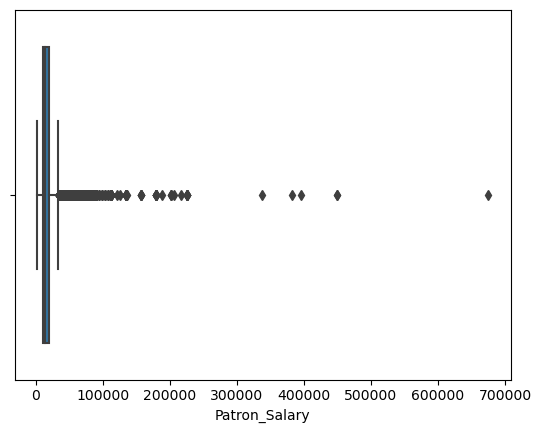


Description of Automobile_Possession
----------------------------------------------------------------------------
count   97480.000
mean        0.333
std         0.471
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Automobile_Possession, dtype: float64 
Central values of Automobile_Possession
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  1.0 
Mean value :  0.3329400902749282 
Median value :  0.0 
Standard deviation :  0.47126772105623016 
Null values :  False 
Null values :  0 
Quartile of Automobile_Possession
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Automobile_Possession
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outliers range:  2.5
Num

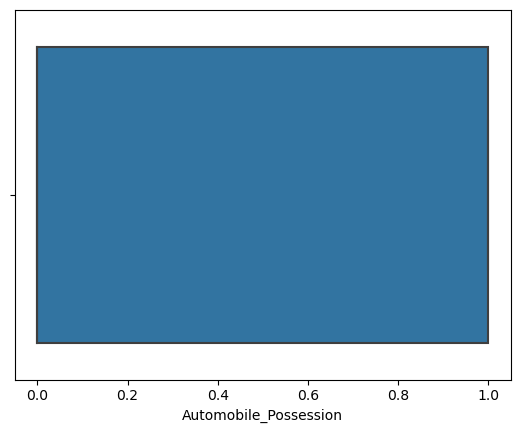


Description of Two-Wheeler_Ownership
----------------------------------------------------------------------------
count   97480.000
mean        0.322
std         0.467
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Two-Wheeler_Ownership, dtype: float64 
Central values of Two-Wheeler_Ownership
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  1.0 
Mean value :  0.32215839146491587 
Median value :  0.0 
Standard deviation :  0.4673056841857771 
Null values :  False 
Null values :  0 
Quartile of Two-Wheeler_Ownership
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Two-Wheeler_Ownership
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outliers range:  2.5
Num

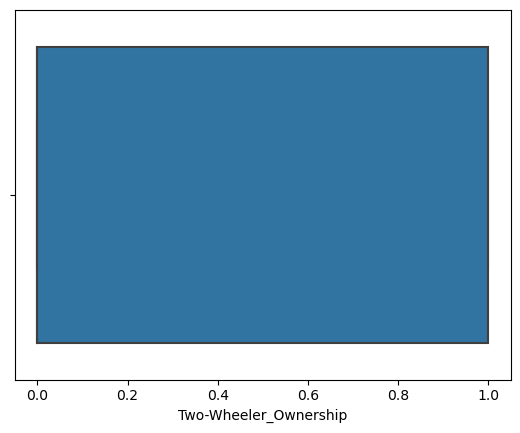


Description of Ongoing_Borrowing
----------------------------------------------------------------------------
count   97480.000
mean        0.491
std         0.500
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Ongoing_Borrowing, dtype: float64 
Central values of Ongoing_Borrowing
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  1.0 
Mean value :  0.49135207221994254 
Median value :  0.0 
Standard deviation :  0.4999277720161624 
Null values :  False 
Null values :  0 
Quartile of Ongoing_Borrowing
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Ongoing_Borrowing
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outliers range:  2.5
Number of outliers in u

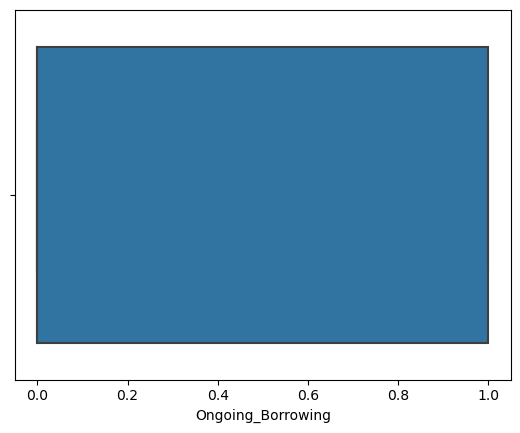


Description of Residence_Proprietorship
----------------------------------------------------------------------------
count   97480.000
mean        0.701
std         0.458
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000
Name: Residence_Proprietorship, dtype: float64 
Central values of Residence_Proprietorship
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  1.0 
Mean value :  0.700677061961428 
Median value :  1.0 
Standard deviation :  0.457963828626095 
Null values :  False 
Null values :  0 
Quartile of Residence_Proprietorship
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Residence_Proprietorship
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outliers ran

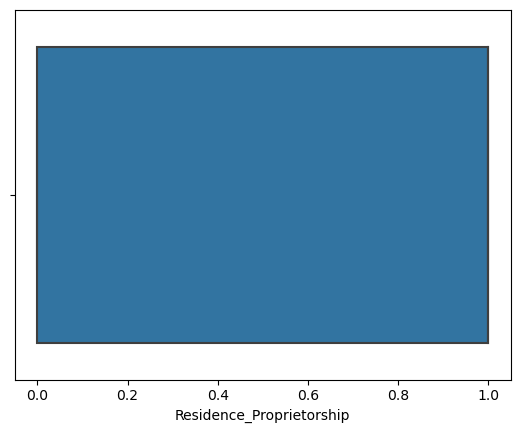


Description of Offspring_Number
----------------------------------------------------------------------------
count   97480.000
mean        0.406
std         0.722
min         0.000
25%         0.000
50%         0.000
75%         1.000
max        19.000
Name: Offspring_Number, dtype: float64 
Central values of Offspring_Number
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  19.0 
Mean value :  0.40557037340993024 
Median value :  0.0 
Standard deviation :  0.7218332586464775 
Null values :  False 
Null values :  0 
Quartile of Offspring_Number
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Offspring_Number
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outliers range:  2.5
Number of outliers in upper

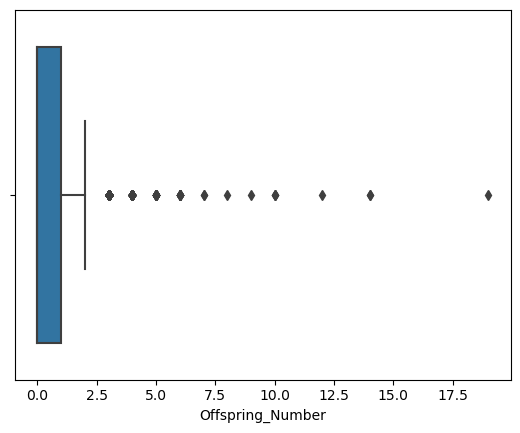


Description of Loan_Capital
----------------------------------------------------------------------------
count    97480.000
mean     59741.873
std      39709.647
min       4500.000
25%      27504.000
50%      50849.550
75%      80865.000
max     405000.000
Name: Loan_Capital, dtype: float64 
Central values of Loan_Capital
----------------------------------------------------------------------------

Minimum :  4500.0 
Maximum :  405000.0 
Mean value :  59741.87252462043 
Median value :  50849.55 
Standard deviation :  39709.64654711183 
Null values :  False 
Null values :  0 
Quartile of Loan_Capital
----------------------------------------------------------------------------
1st Quartile (Q1) is:  27504.0
3st Quartile (Q3) is:  80865.0
Interquartile range (IQR) is  53361.0

Outlier detection from Interquartile range (IQR) Loan_Capital
----------------------------------------------------------------------------

Lower outliers range:  -52537.5

Upper outliers range:  160906.5
Number of

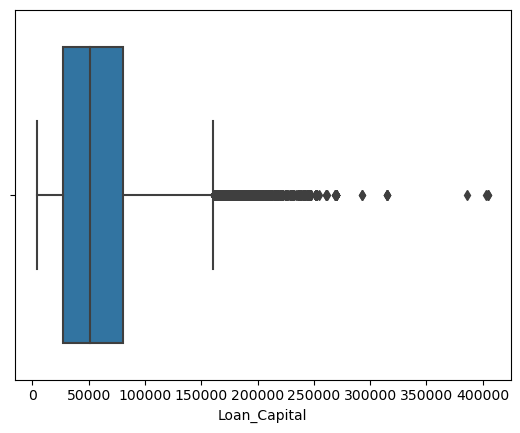


Description of Borrowing_Periodic_Payment
----------------------------------------------------------------------------
count   97480.000
mean     2715.405
std      1432.045
min       217.350
25%      1687.500
50%      2484.450
75%      3411.450
max     22500.000
Name: Borrowing_Periodic_Payment, dtype: float64 
Central values of Borrowing_Periodic_Payment
----------------------------------------------------------------------------

Minimum :  217.35 
Maximum :  22500.0 
Mean value :  2715.4046614690196 
Median value :  2484.45 
Standard deviation :  1432.0453358911275 
Null values :  False 
Null values :  0 
Quartile of Borrowing_Periodic_Payment
----------------------------------------------------------------------------
1st Quartile (Q1) is:  1687.5
3st Quartile (Q3) is:  3411.45
Interquartile range (IQR) is  1723.9499999999998

Outlier detection from Interquartile range (IQR) Borrowing_Periodic_Payment
----------------------------------------------------------------------------

Lo

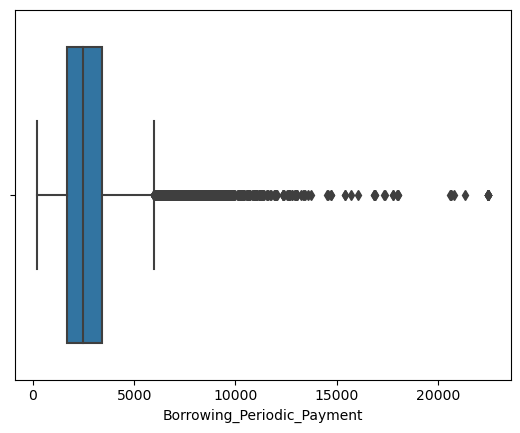


Description of Population_Fraction_by_Region
----------------------------------------------------------------------------
count   97480.000
mean        0.023
std         0.453
min         0.001
25%         0.010
50%         0.019
75%         0.026
max       100.000
Name: Population_Fraction_by_Region, dtype: float64 
Central values of Population_Fraction_by_Region
----------------------------------------------------------------------------

Minimum :  0.000533 
Maximum :  100.0 
Mean value :  0.022890983299138284 
Median value :  0.01885 
Standard deviation :  0.45306633185870676 
Null values :  False 
Null values :  0 
Quartile of Population_Fraction_by_Region
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.010032
3st Quartile (Q3) is:  0.026392
Interquartile range (IQR) is  0.01636

Outlier detection from Interquartile range (IQR) Population_Fraction_by_Region
----------------------------------------------------------------------

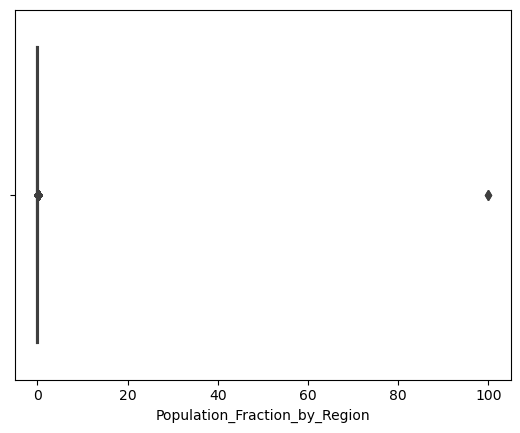


Description of Elderliness_in_Days
----------------------------------------------------------------------------
count   97480.000
mean    16020.307
std      4332.671
min      7676.000
25%     12502.000
50%     15583.000
75%     19625.000
max     25201.000
Name: Elderliness_in_Days, dtype: float64 
Central values of Elderliness_in_Days
----------------------------------------------------------------------------

Minimum :  7676.0 
Maximum :  25201.0 
Mean value :  16020.306960402133 
Median value :  15583.0 
Standard deviation :  4332.671352208938 
Null values :  False 
Null values :  0 
Quartile of Elderliness_in_Days
----------------------------------------------------------------------------
1st Quartile (Q1) is:  12502.0
3st Quartile (Q3) is:  19625.0
Interquartile range (IQR) is  7123.0

Outlier detection from Interquartile range (IQR) Elderliness_in_Days
----------------------------------------------------------------------------

Lower outliers range:  1817.5

Upper outliers ran

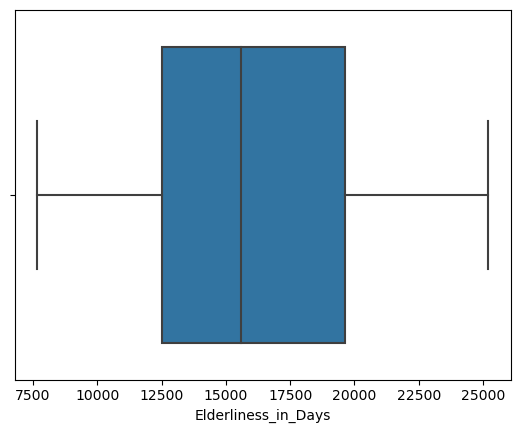


Description of Work_Duration_in_Days
----------------------------------------------------------------------------
count    97480.000
mean     67261.170
std     139081.455
min          0.000
25%        964.000
50%       2159.000
75%       5563.000
max     365243.000
Name: Work_Duration_in_Days, dtype: float64 
Central values of Work_Duration_in_Days
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  365243.0 
Mean value :  67261.16956298728 
Median value :  2159.0 
Standard deviation :  139081.45515963095 
Null values :  False 
Null values :  0 
Quartile of Work_Duration_in_Days
----------------------------------------------------------------------------
1st Quartile (Q1) is:  964.0
3st Quartile (Q3) is:  5563.0
Interquartile range (IQR) is  4599.0

Outlier detection from Interquartile range (IQR) Work_Duration_in_Days
----------------------------------------------------------------------------

Lower outliers range:  -5934.5

Upper

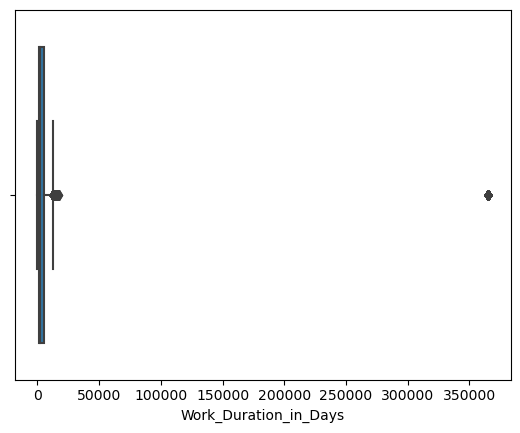


Description of Enlistment_Period_in_Days
----------------------------------------------------------------------------
count   97480.000
mean     4965.775
std      3471.464
min         0.000
25%      2087.750
50%      4406.000
75%      7352.250
max     23738.000
Name: Enlistment_Period_in_Days, dtype: float64 
Central values of Enlistment_Period_in_Days
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  23738.0 
Mean value :  4965.774856380796 
Median value :  4406.0 
Standard deviation :  3471.4637461748616 
Null values :  False 
Null values :  0 
Quartile of Enlistment_Period_in_Days
----------------------------------------------------------------------------
1st Quartile (Q1) is:  2087.75
3st Quartile (Q3) is:  7352.25
Interquartile range (IQR) is  5264.5

Outlier detection from Interquartile range (IQR) Enlistment_Period_in_Days
----------------------------------------------------------------------------

Lower outliers range:  

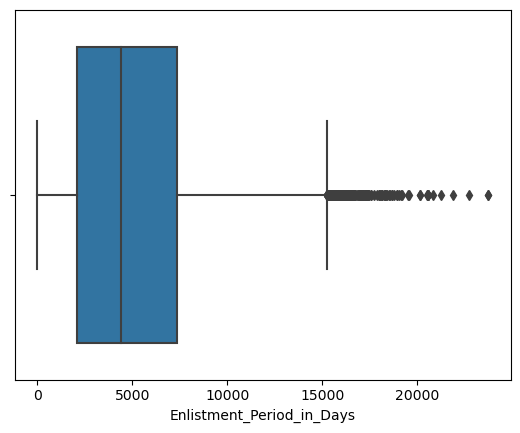


Description of Identity_Age_in_Days
----------------------------------------------------------------------------
count   97480.000
mean     2995.371
std      1479.007
min         0.000
25%      1789.000
50%      3148.000
75%      4262.000
max      7197.000
Name: Identity_Age_in_Days, dtype: float64 
Central values of Identity_Age_in_Days
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7197.0 
Mean value :  2995.371419778416 
Median value :  3148.0 
Standard deviation :  1479.0065619833597 
Null values :  False 
Null values :  0 
Quartile of Identity_Age_in_Days
----------------------------------------------------------------------------
1st Quartile (Q1) is:  1789.0
3st Quartile (Q3) is:  4262.0
Interquartile range (IQR) is  2473.0

Outlier detection from Interquartile range (IQR) Identity_Age_in_Days
----------------------------------------------------------------------------

Lower outliers range:  -1920.5

Upper outliers rang

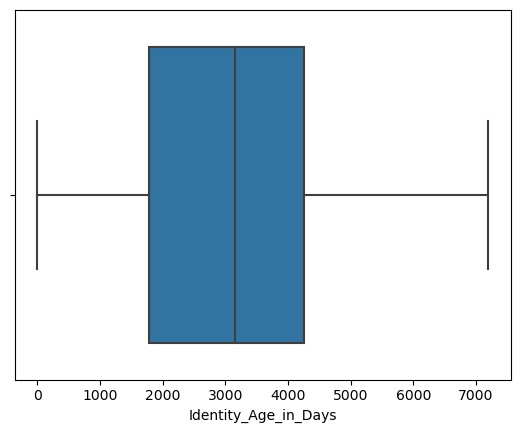


Description of Cellphone_Marker
----------------------------------------------------------------------------
count   97480.000
mean        1.000
std         0.003
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: Cellphone_Marker, dtype: float64 
Central values of Cellphone_Marker
----------------------------------------------------------------------------

Minimum :  0 
Maximum :  1 
Mean value :  0.999989741485433 
Median value :  1.0 
Standard deviation :  0.0032028915946532587 
Null values :  False 
Null values :  0 
Quartile of Cellphone_Marker
----------------------------------------------------------------------------
1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  0.0

Outlier detection from Interquartile range (IQR) Cellphone_Marker
----------------------------------------------------------------------------

Lower outliers range:  1.0

Upper outliers range:  1.0
Number of outliers in upper :  0

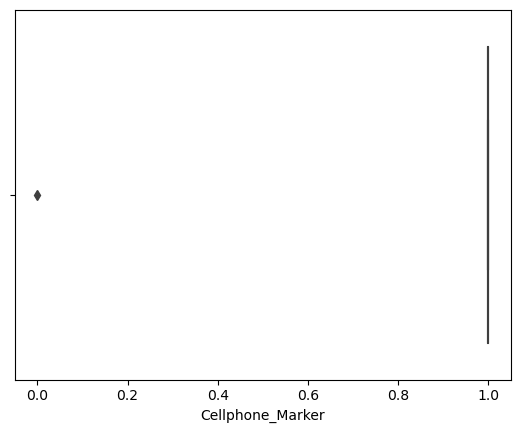


Description of Residential_Phone_Marker
----------------------------------------------------------------------------
count   97480.000
mean        0.200
std         0.400
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Residential_Phone_Marker, dtype: float64 
Central values of Residential_Phone_Marker
----------------------------------------------------------------------------

Minimum :  0 
Maximum :  1 
Mean value :  0.20008206811653673 
Median value :  0.0 
Standard deviation :  0.40006358996920777 
Null values :  False 
Null values :  0 
Quartile of Residential_Phone_Marker
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0

Outlier detection from Interquartile range (IQR) Residential_Phone_Marker
----------------------------------------------------------------------------

Lower outliers range:  0.0

Upper outliers rang

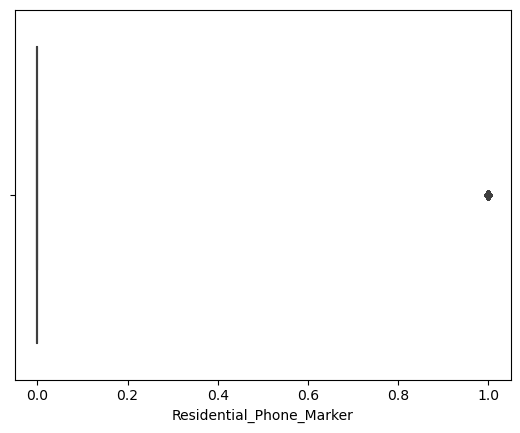


Description of Employment_Phone_Operation
----------------------------------------------------------------------------
count   97480.000
mean        0.281
std         0.450
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Employment_Phone_Operation, dtype: float64 
Central values of Employment_Phone_Operation
----------------------------------------------------------------------------

Minimum :  0 
Maximum :  1 
Mean value :  0.2812474353713582 
Median value :  0.0 
Standard deviation :  0.4496102636961542 
Null values :  False 
Null values :  0 
Quartile of Employment_Phone_Operation
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  1.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Employment_Phone_Operation
----------------------------------------------------------------------------

Lower outliers range:  -1.5

Upper outl

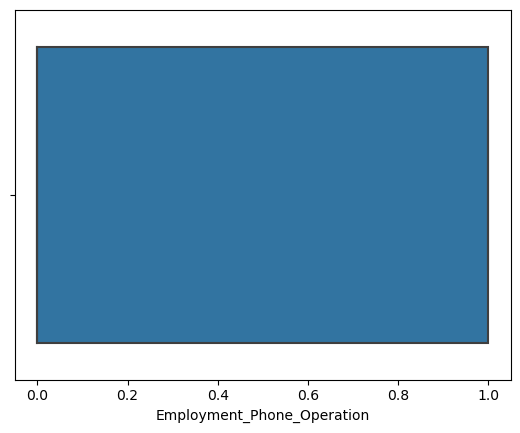


Description of Patron_Kin_Count
----------------------------------------------------------------------------
count   97480.000
mean        2.151
std         0.904
min         1.000
25%         2.000
50%         2.000
75%         3.000
max        15.000
Name: Patron_Kin_Count, dtype: float64 
Central values of Patron_Kin_Count
----------------------------------------------------------------------------

Minimum :  1.0 
Maximum :  15.0 
Mean value :  2.151025851456709 
Median value :  2.0 
Standard deviation :  0.9043698641865249 
Null values :  False 
Null values :  0 
Quartile of Patron_Kin_Count
----------------------------------------------------------------------------
1st Quartile (Q1) is:  2.0
3st Quartile (Q3) is:  3.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) Patron_Kin_Count
----------------------------------------------------------------------------

Lower outliers range:  0.5

Upper outliers range:  4.5
Number of outliers in upper : 

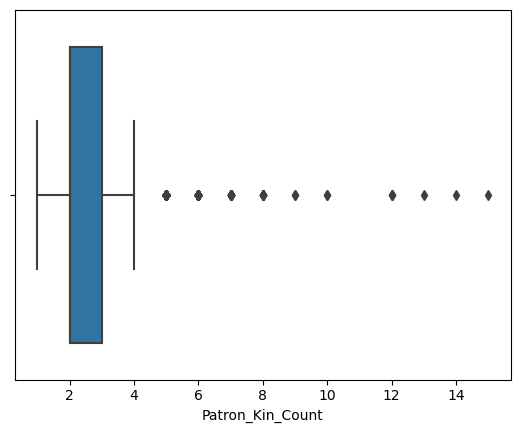


Description of Customer_Urban_Area_Ranking
----------------------------------------------------------------------------
count   97480.000
mean        2.030
std         0.500
min         1.000
25%         2.000
50%         2.000
75%         2.000
max         3.000
Name: Customer_Urban_Area_Ranking, dtype: float64 
Central values of Customer_Urban_Area_Ranking
----------------------------------------------------------------------------

Minimum :  1.0 
Maximum :  3.0 
Mean value :  2.029718916700862 
Median value :  2.0 
Standard deviation :  0.4997450523941742 
Null values :  False 
Null values :  0 
Quartile of Customer_Urban_Area_Ranking
----------------------------------------------------------------------------
1st Quartile (Q1) is:  2.0
3st Quartile (Q3) is:  2.0
Interquartile range (IQR) is  0.0

Outlier detection from Interquartile range (IQR) Customer_Urban_Area_Ranking
----------------------------------------------------------------------------

Lower outliers range:  2.0

Upp

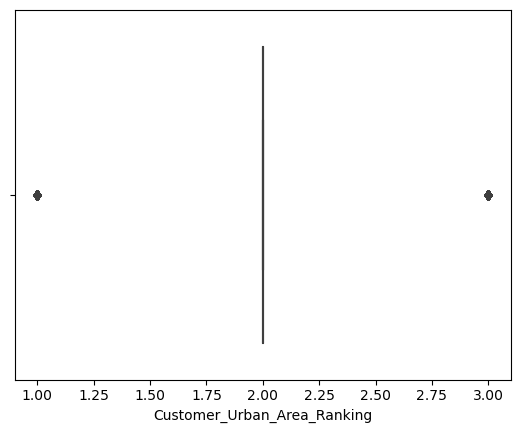


Description of Request_Submission_Day
----------------------------------------------------------------------------
count   97480.000
mean        3.156
std         1.741
min         0.000
25%         2.000
50%         3.000
75%         5.000
max         6.000
Name: Request_Submission_Day, dtype: float64 
Central values of Request_Submission_Day
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  6.0 
Mean value :  3.1562884694296267 
Median value :  3.0 
Standard deviation :  1.7407030002013872 
Null values :  False 
Null values :  0 
Quartile of Request_Submission_Day
----------------------------------------------------------------------------
1st Quartile (Q1) is:  2.0
3st Quartile (Q3) is:  5.0
Interquartile range (IQR) is  3.0

Outlier detection from Interquartile range (IQR) Request_Submission_Day
----------------------------------------------------------------------------

Lower outliers range:  -2.5

Upper outliers range:  9.5

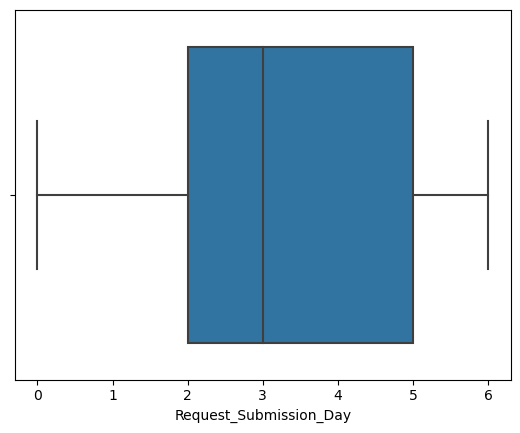


Description of Request_Submission_Hour
----------------------------------------------------------------------------
count   97480.000
mean       12.058
std         3.233
min         0.000
25%        10.000
50%        12.000
75%        14.000
max        23.000
Name: Request_Submission_Hour, dtype: float64 
Central values of Request_Submission_Hour
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  23.0 
Mean value :  12.057868280672958 
Median value :  12.0 
Standard deviation :  3.2327142272127127 
Null values :  False 
Null values :  0 
Quartile of Request_Submission_Hour
----------------------------------------------------------------------------
1st Quartile (Q1) is:  10.0
3st Quartile (Q3) is:  14.0
Interquartile range (IQR) is  4.0

Outlier detection from Interquartile range (IQR) Request_Submission_Hour
----------------------------------------------------------------------------

Lower outliers range:  4.0

Upper outliers ran

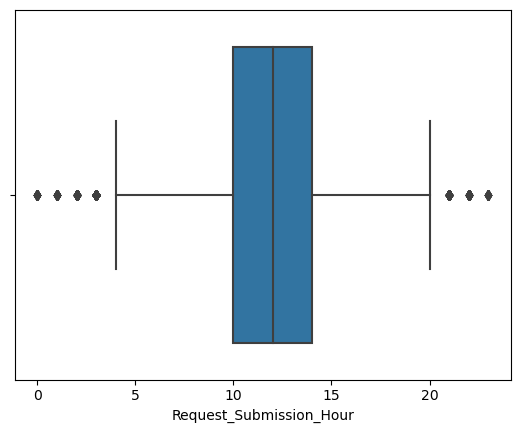


Description of Rating_Origin_2
----------------------------------------------------------------------------
count   97480.000
mean        0.519
std         0.583
min         0.000
25%         0.403
50%         0.561
75%         0.660
max       100.000
Name: Rating_Origin_2, dtype: float64 
Central values of Rating_Origin_2
----------------------------------------------------------------------------

Minimum :  1.64e-05 
Maximum :  100.0 
Mean value :  0.5192246884978458 
Median value :  0.561249962 
Standard deviation :  0.5828925525781681 
Null values :  False 
Null values :  0 
Quartile of Rating_Origin_2
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.4028974835
3st Quartile (Q3) is:  0.6597805590000001
Interquartile range (IQR) is  0.2568830755000001

Outlier detection from Interquartile range (IQR) Rating_Origin_2
----------------------------------------------------------------------------

Lower outliers range:  0.01757287024

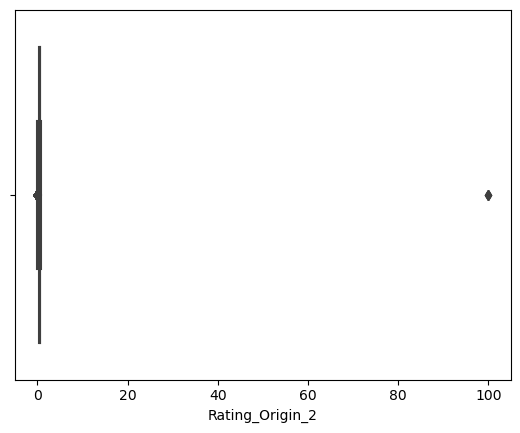


Description of Rating_Origin_3
----------------------------------------------------------------------------
count   97480.000
mean        0.517
std         0.172
min         0.001
25%         0.424
50%         0.521
75%         0.631
max         0.896
Name: Rating_Origin_3, dtype: float64 
Central values of Rating_Origin_3
----------------------------------------------------------------------------

Minimum :  0.000527265 
Maximum :  0.896009549 
Mean value :  0.5165126958381001 
Median value :  0.520897599 
Standard deviation :  0.1721430100399397 
Null values :  False 
Null values :  0 
Quartile of Rating_Origin_3
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.424130311
3st Quartile (Q3) is:  0.631354537
Interquartile range (IQR) is  0.207224226

Outlier detection from Interquartile range (IQR) Rating_Origin_3
----------------------------------------------------------------------------

Lower outliers range:  0.11329397199999997

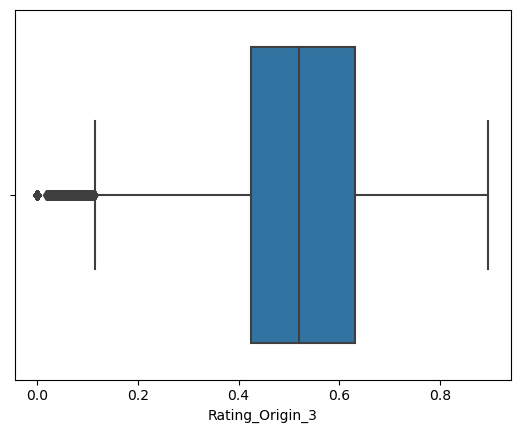


Description of Telecommunication_Switch
----------------------------------------------------------------------------
count   97480.000
mean      955.486
std       816.672
min         0.000
25%       287.000
50%       752.000
75%      1548.000
max      4185.000
Name: Telecommunication_Switch, dtype: float64 
Central values of Telecommunication_Switch
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4185.0 
Mean value :  955.4860945835043 
Median value :  752.0 
Standard deviation :  816.6718120877144 
Null values :  False 
Null values :  0 
Quartile of Telecommunication_Switch
----------------------------------------------------------------------------
1st Quartile (Q1) is:  287.0
3st Quartile (Q3) is:  1548.0
Interquartile range (IQR) is  1261.0

Outlier detection from Interquartile range (IQR) Telecommunication_Switch
----------------------------------------------------------------------------

Lower outliers range:  -1604.5

Up

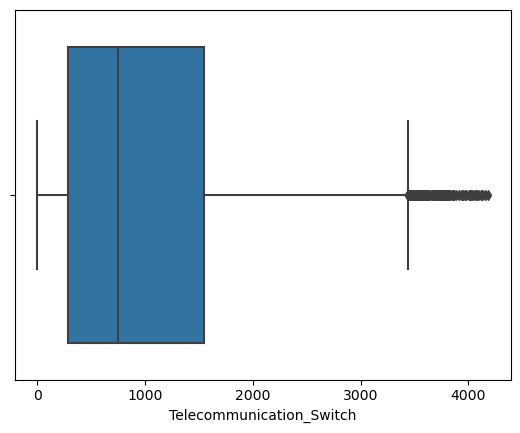


Description of Solvency_Information_Agency
----------------------------------------------------------------------------
count   97480.000
mean        1.783
std         1.741
min         0.000
25%         1.000
50%         1.000
75%         3.000
max        22.000
Name: Solvency_Information_Agency, dtype: float64 
Central values of Solvency_Information_Agency
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  22.0 
Mean value :  1.7827246614690193 
Median value :  1.0 
Standard deviation :  1.741386978393403 
Null values :  False 
Null values :  0 
Quartile of Solvency_Information_Agency
----------------------------------------------------------------------------
1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  3.0
Interquartile range (IQR) is  2.0

Outlier detection from Interquartile range (IQR) Solvency_Information_Agency
----------------------------------------------------------------------------

Lower outliers range:  -2.0

U

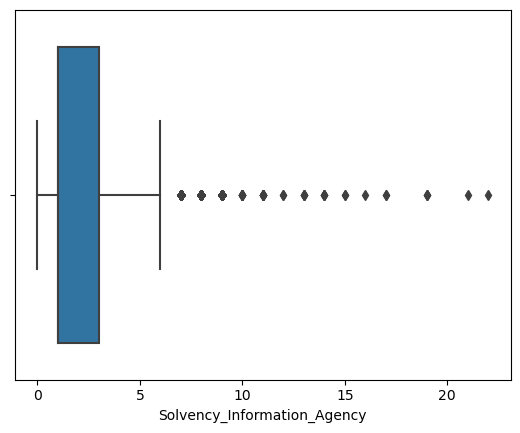


Description of Default
----------------------------------------------------------------------------
count   97480.000
mean        0.081
std         0.273
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: Default, dtype: float64 
Central values of Default
----------------------------------------------------------------------------

Minimum :  0 
Maximum :  1 
Mean value :  0.08078580221583914 
Median value :  0.0 
Standard deviation :  0.2725072809593407 
Null values :  False 
Null values :  0 
Quartile of Default
----------------------------------------------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0

Outlier detection from Interquartile range (IQR) Default
----------------------------------------------------------------------------

Lower outliers range:  0.0

Upper outliers range:  0.0
Number of outliers in upper :  7875
Number of outliers in lower :  0
% of Outl

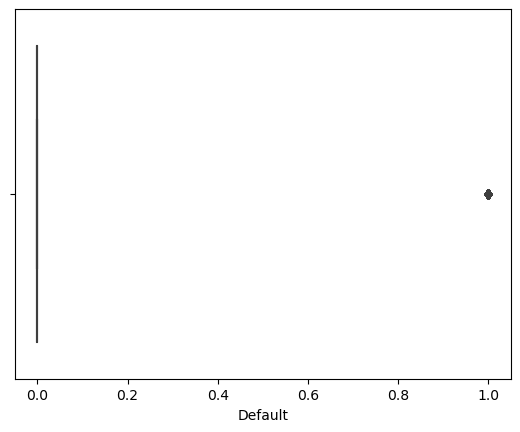

In [74]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric1(x,20, df_train)

### Outlier Treatment

In [160]:
def describe_(df):
    df1 = df.describe().reset_index()
    df1.drop('index', inplace = True, axis = 1)
#     print(df1)
    
    return df1

def out_zscore(data):
    global outliers, zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        if std != 0:
            z_score = (i - mean) / std
#             print(z_score)
            zscore.append(z_score)
            
            if np.abs(z_score) > threshold:
                outliers.append(i)
        
        else:
            pass
    
    return outliers

def treat_outlier(df, i):
    # Computing 10th, 90th percentiles and replacing the outliers
    tenth_percentile = np.percentile(df[i], 5)
    ninetieth_percentile = np.percentile(df[i], 95)
    b = np.where(df[i] < tenth_percentile, tenth_percentile, df[i])
    b = np.where(b >  ninetieth_percentile, ninetieth_percentile, b)
    df[i] = b
    return df

In [161]:
for i in describe_(df_train).columns:
    if i != 'Default':
        outliers = out_zscore(df_train[i])
        print("Total number of outliers in", i, ":", len(outliers))
    
print("-----------------------------------------------------------------------")
for i in describe_(df_train).columns:
    if i != 'Default':
        treat_outlier(df_train, i)
    
for i in describe_(df_train).columns:
    if i != 'Default':
        outliers = out_zscore(df_train[i])
        print("Total number of outliers in", i, ":", len(outliers))

Total number of outliers in Patron_Salary : 939
Total number of outliers in Automobile_Possession : 0
Total number of outliers in Two-Wheeler_Ownership : 0
Total number of outliers in Ongoing_Borrowing : 0
Total number of outliers in Residence_Proprietorship : 0
Total number of outliers in Offspring_Number : 1344
Total number of outliers in Loan_Capital : 1321
Total number of outliers in Borrowing_Periodic_Payment : 935
Total number of outliers in Population_Fraction_by_Region : 2
Total number of outliers in Elderliness_in_Days : 0
Total number of outliers in Work_Duration_in_Days : 0
Total number of outliers in Enlistment_Period_in_Days : 262
Total number of outliers in Identity_Age_in_Days : 0
Total number of outliers in Cellphone_Marker : 1
Total number of outliers in Residential_Phone_Marker : 0
Total number of outliers in Employment_Phone_Operation : 0
Total number of outliers in Patron_Kin_Count : 1270
Total number of outliers in Customer_Urban_Area_Ranking : 0
Total number of ou

In [162]:
for i in describe_(df_test).columns:
    if i != 'Default':
        outliers = out_zscore(df_test[i])
        print("Total number of outliers in", i, ":", len(outliers))
    
print("-----------------------------------------------------------------------")
for i in describe_(df_test).columns:
    if i != 'Default':
        treat_outlier(df_test, i)
    
for i in describe_(df_test).columns:
    if i != 'Default':
        outliers = out_zscore(df_test[i])
        print("Total number of outliers in", i, ":", len(outliers))

Total number of outliers in Patron_Salary : 134
Total number of outliers in Automobile_Possession : 0
Total number of outliers in Two-Wheeler_Ownership : 0
Total number of outliers in Ongoing_Borrowing : 0
Total number of outliers in Residence_Proprietorship : 0
Total number of outliers in Offspring_Number : 315
Total number of outliers in Loan_Capital : 249
Total number of outliers in Borrowing_Periodic_Payment : 224
Total number of outliers in Population_Fraction_by_Region : 654
Total number of outliers in Elderliness_in_Days : 0
Total number of outliers in Work_Duration_in_Days : 0
Total number of outliers in Enlistment_Period_in_Days : 67
Total number of outliers in Identity_Age_in_Days : 0
Total number of outliers in Cellphone_Marker : 0
Total number of outliers in Residential_Phone_Marker : 0
Total number of outliers in Employment_Phone_Operation : 0
Total number of outliers in Patron_Kin_Count : 294
Total number of outliers in Customer_Urban_Area_Ranking : 0
Total number of outl

In [163]:
df_train.to_csv('Train_v1.2.csv', index = False)
df_test.to_csv('Test_v1.2.csv', index = False)